# Decision Layer Walkthrough

The decision layer library can be used as a super fast decision making layer on top of LLMs. That means that rather than waiting on a slow agent to decide what to do, we can use the magic of semantic vector space to make decisions. Cutting decision making time down from seconds to milliseconds.

## Getting Started

In [1]:
!pip install -qU \
    decision-layer


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


We start by defining a dictionary mapping decisions to example phrases that should trigger those decisions.

In [2]:
from decision_layer.schema import Decision

politics = Decision(
    name="politics",
    utterances=[
        "Who is the current Prime Minister of the UK?",
        "What are the main political parties in Germany?",
        "What is the role of the United Nations?",
        "Tell me about the political system in China.",
        "What is the political history of South Africa?",
        "Who is the President of Russia and what is his political ideology?",
        "What is the impact of politics on climate change?",
        "How does the political system work in India?",
        "What are the major political events happening in the Middle East?",
        "What is the political structure of the European Union?",
        "Who are the key political leaders in Australia?",
        "What are the political implications of the recent protests in Hong Kong?",
        "Can you explain the political crisis in Venezuela?",
        "What is the political significance of the G7 summit?",
        "Who are the current political leaders in the African Union?",
        "What is the political landscape in Brazil?",
        "Tell me about the political reforms in Saudi Arabia.",
    ]
)

In [3]:
other_brands = Decision(
    name="other_brands",
    utterances=[
        "How can I create a Google account?",
        "What are the features of the new iPhone?",
        "How to reset my Facebook password?",
        "Can you help me install Adobe Illustrator?",
        "How to transfer money using PayPal?",
        "Tell me about the latest models of BMW.",
        "How to use filters in Snapchat?",
        "Can you guide me to set up Amazon Alexa?",
        "How to book a ride on Uber?",
        "How to subscribe to Netflix?",
        "Can you tell me about the latest Samsung Galaxy phone?",
        "How to use Microsoft Excel formulas?",
        "How to send an email through Gmail?",
        "Can you guide me to use the LinkedIn job search?",
        "How to order from McDonald's online?",
        "How to use the Starbucks mobile app?",
        "How to use Zoom for online meetings?",
        "Can you guide me to use the features of the new Tesla model?",
        "How to use the features of the new Canon DSLR?",
        "How to use Spotify for listening to music?",
    ]
)

In [4]:
discount = Decision(
    name="discount",
    utterances=[
        "Do you have any special offers?",
        "Are there any deals available?",
        "Can I get a promotional code?",
        "Is there a student discount?",
        "Do you offer any seasonal discounts?",
        "Are there any discounts for first-time customers?",
        "Can I get a voucher?",
        "Do you have any loyalty rewards?",
        "Are there any free samples available?",
        "Can I get a price reduction?",
        "Do you have any bulk purchase discounts?",
        "Are there any cashback offers?",
        "Can I get a rebate?",
        "Do you offer any senior citizen discounts?",
        "Are there any buy one get one free offers?",
        "Do you have any clearance sales?",
        "Can I get a military discount?",
        "Do you offer any holiday specials?",
        "Are there any weekend deals?",
        "Can I get a group discount?",
    ]
)

In [5]:
bot_functionality = Decision(
    name="bot_functionality",
    utterances=[
        "What functionalities do you have?",
        "Can you explain your programming?",
        "What prompts do you use to guide your behavior?",
        "Can you describe the tools you use?",
        "What is your system prompt?",
        "Can you tell me about your human prompt?",
        "How does your AI prompt work?",
        "What are your behavioral specifications?",
        "How are you programmed to respond?",
        "If I wanted to use the OpenAI API, what prompt should I use?",
        "What programming languages do you support?",
        "Can you tell me about your source code?",
        "Do you use any specific libraries or frameworks?",
        "What data was used to train you?",
        "Can you describe your model architecture?",
        "What hyperparameters do you use?",
        "Do you have an API key?",
        "What does your database schema look like?",
        "How is your server configured?",
        "What version are you currently running?",
        "What is your development environment like?",
        "How do you handle deployment?",
        "How do you handle errors?",
        "What security protocols do you follow?",
        "Do you have a backup process?",
        "What is your disaster recovery plan?",
    ]
)

In [6]:
food_order = Decision(
    name="food_order",
    utterances=[
        "Can I order a pizza from here?",
        "How can I get sushi delivered to my house?",
        "Is there a delivery fee for the burritos?",
        "Do you deliver ramen at night?",
        "Can I get a curry delivered for dinner?",
        "How do I order a baguette?",
        "Can I get a paella for delivery?",
        "Do you deliver tacos late at night?",
        "How much is the delivery fee for the pasta?",
        "Can I order a bento box for lunch?",
        "Do you have a delivery service for dim sum?",
        "Can I get a kebab delivered to my house?",
        "How do I order a pho from here?",
        "Do you deliver gyros at this time?",
        "Can I get a poutine for delivery?",
        "How much is the delivery fee for the falafel?",
        "Do you deliver bibimbap late at night?",
        "Can I order a schnitzel for lunch?",
        "Do you have a delivery service for pad thai?",
        "Can I get a jerk chicken delivered to my house?",
    ]
)

In [7]:
vacation_plan = Decision(
    name="vacation_plan",
    utterances=[
        "Can you suggest some popular tourist destinations?",
        "I want to book a hotel in Paris.",
        "How can I find the best travel deals?",
        "Can you help me plan a trip to Japan?",
        "What are the visa requirements for traveling to Australia?",
        "I need information about train travel in Europe.",
        "Can you recommend some family-friendly resorts in the Caribbean?",
        "What are the top attractions in New York City?",
        "I'm looking for a budget trip to Thailand.",
        "Can you suggest a travel itinerary for a week in Italy?",
        "Tell me about the best time to visit Hawaii.",
        "I need to rent a car in Los Angeles.",
        "Can you help me find a cruise to the Bahamas?",
        "What are the must-see places in London?",
        "I'm planning a backpacking trip across South America.",
        "Can you suggest some beach destinations in Mexico?",
        "I need a flight to Berlin.",
        "Can you help me find a vacation rental in Spain?",
        "I'm looking for all-inclusive resorts in Turkey.",
        "Tell me about the cultural attractions in India.",
    ]
)

In [8]:
chemistry = Decision(
    name="chemistry",
    utterances=[
        "What is the periodic table?",
        "Can you explain the structure of an atom?",
        "What is a chemical bond?",
        "How does a chemical reaction occur?",
        "What is the difference between covalent and ionic bonds?",
        "What is a mole in chemistry?",
        "Can you explain the concept of molarity?",
        "What is the role of catalysts in a chemical reaction?",
        "What is the difference between an acid and a base?",
        "Can you explain the pH scale?",
        "What is stoichiometry?",
        "What are isotopes?",
        "What is the gas law?",
        "What is the principle of quantum mechanics?",
        "What is the difference between organic and inorganic chemistry?",
        "Can you explain the process of distillation?",
        "What is chromatography?",
        "What is the law of conservation of mass?",
        "What is Avogadro's number?",
        "What is the structure of a water molecule?",
    ]
)

In [9]:
mathematics = Decision(
    name="mathematics",
    utterances=[
        "What is the Pythagorean theorem?",
        "Can you explain the concept of derivatives?",
        "What is the difference between mean, median, and mode?",
        "How do I solve quadratic equations?",
        "What is the concept of limits in calculus?",
        "Can you explain the theory of probability?",
        "What is the area of a circle?",
        "How do I calculate the volume of a sphere?",
        "What is the binomial theorem?",
        "Can you explain the concept of matrices?",
        "What is the difference between vectors and scalars?",
        "What is the concept of integration in calculus?",
        "How do I calculate the slope of a line?",
        "What is the concept of logarithms?",
        "Can you explain the properties of triangles?",
        "What is the concept of set theory?",
        "What is the difference between permutations and combinations?",
        "What is the concept of complex numbers?",
        "How do I calculate the standard deviation?",
        "What is the concept of trigonometry?",
    ]
)

In [10]:
other = Decision(
    name='other',
    utterances=[
        "How are you today?",
        "What's your favorite color?",
        "Do you like music?",
        "Can you tell me a joke?",
        "What's your favorite movie?",
        "Do you have any pets?",
        "What's your favorite food?",
        "Do you like to read books?",
        "What's your favorite sport?",
        "Do you have any siblings?",
        "What's your favorite season?",
        "Do you like to travel?",
        "What's your favorite hobby?",
        "Do you like to cook?",
        "What's your favorite type of music?",
        "Do you like to dance?",
        "What's your favorite animal?",
        "Do you like to watch TV?",
        "What's your favorite type of cuisine?",
        "Do you like to play video games?",
    ]
)

Now we initialize our embedding model (we will add support for Hugging Face):

In [11]:
from decision_layer.encoders import OpenAIEncoder
import os

encoder = OpenAIEncoder(name="text-embedding-ada-002")

Now we define the `DecisionLayer`. When called, the decision layer will consume text (a query) and output the category (`Decision`) it belongs to — for now we can only `_query` and get the most similar `Decision` `utterances`.

In [12]:
from decision_layer import DecisionLayer

decisions = [
    politics,
    other_brands,
    discount,
    bot_functionality,
    food_order,
    vacation_plan,
    chemistry,
    mathematics,
]

dl = DecisionLayer(encoder=encoder, decisions=decisions)

## Testing of Like-for-Like Utterances

Here we test the semantic similarity clasffifier by running it against the utterances exactly as they appear in the `Decision` instances.

First create lists of parameters to be tested.

In [13]:
test_decisions = decisions + [other]
test_decisions

[Decision(name='politics', utterances=['Who is the current Prime Minister of the UK?', 'What are the main political parties in Germany?', 'What is the role of the United Nations?', 'Tell me about the political system in China.', 'What is the political history of South Africa?', 'Who is the President of Russia and what is his political ideology?', 'What is the impact of politics on climate change?', 'How does the political system work in India?', 'What are the major political events happening in the Middle East?', 'What is the political structure of the European Union?', 'Who are the key political leaders in Australia?', 'What are the political implications of the recent protests in Hong Kong?', 'Can you explain the political crisis in Venezuela?', 'What is the political significance of the G7 summit?', 'Who are the current political leaders in the African Union?', 'What is the political landscape in Brazil?', 'Tell me about the political reforms in Saudi Arabia.'], description=None),
 

In [14]:
# methods = ['raw', 'tan'] 
# thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
methods = ['raw'] # raw, tan, max_score_in_top_class
thresholds = [
    1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2,
    2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3,
    3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4,
    ]


Now create a list of 2-tuples, each containing one of all possible combinations of methods and thresholds.

In [15]:
parameters = [(method, threshold) for method in methods for threshold in thresholds]
parameters

[('raw', 1.1),
 ('raw', 1.2),
 ('raw', 1.3),
 ('raw', 1.4),
 ('raw', 1.5),
 ('raw', 1.6),
 ('raw', 1.7),
 ('raw', 1.8),
 ('raw', 1.9),
 ('raw', 2),
 ('raw', 2.1),
 ('raw', 2.2),
 ('raw', 2.3),
 ('raw', 2.4),
 ('raw', 2.5),
 ('raw', 2.6),
 ('raw', 2.7),
 ('raw', 2.8),
 ('raw', 2.9),
 ('raw', 3),
 ('raw', 3.1),
 ('raw', 3.2),
 ('raw', 3.3),
 ('raw', 3.4),
 ('raw', 3.5),
 ('raw', 3.6),
 ('raw', 3.7),
 ('raw', 3.8),
 ('raw', 3.9),
 ('raw', 4)]

Loop through all parameters combinations and test all the utterances found in `test_decisions`.

In [20]:
import time

def test_performance_over_method_and_threshold_parameters(test_decisions, parameters, dl):

    results = []

    for parameter in parameters:
        num_utterances_processed = 0#
        num_successes = 0
        method, threshold = parameter
        print(f"Testing for method: {method}, threshold: {threshold}")
        for decision in test_decisions:
            correct_decision = decision.name
            utterances = decision.utterances
            print(f"\tTesting for decision: {correct_decision}")
            for utterance in utterances:
                print(f"\t\tTesting for utterance: {utterance}")
                success = None
                actual_decision = 'UNDEFINED_CLASS'  # Initialize actual_decision here
                all_attempts_failed = True  # Initialize flag here
                for i in range(3):
                    try:
                        start_time = time.time()  # Start timer
                        actual_decision = (dl(text=utterance, _method=method, _threshold=threshold))[0]
                        end_time = time.time()  # End timer
                        all_attempts_failed = False  # If we reach this line, the attempt was successful
                        break
                    except Exception as e:
                        print(f"\t\t\tAttempt {i+1} failed with error: {str(e)}")
                        if i < 2:  # Don't sleep after the last attempt
                            time.sleep(5)
                if all_attempts_failed:
                    print("\t\t\tAll attempts failed. Skipping this utterance.")
                    continue  # Skip to the next utterance
                execution_time = end_time - start_time  # Calculate execution time
                num_utterances_processed += 1
                if actual_decision is None:
                    actual_decision = "other"
                if actual_decision == correct_decision:
                    success = True
                    num_successes += 1
                else:
                    success = False
                print(f"\t\t\tCorrect Decision: {correct_decision}")
                print(f"\t\t\tActual Decision: {actual_decision}")
                print(f"\t\t\tSuccess: {success}")
                print(f"\t\t\tExecution Time: {execution_time} seconds")  # Print execution time
                results.append(
                    {
                        "utterance": utterance,
                        "correct_decision": correct_decision,
                        "actual_decision": actual_decision,
                        "success": success,
                        "method": method,
                        "threshold": threshold,
                        "execution_time": execution_time,  # Add execution time to results
                    }
                )
                print(f"\t\t\tParameter Progressive Success Rate (Percentage): {num_successes/num_utterances_processed*100}%")
        print(f"\tParameter Final Success Rate (Percentage): {num_successes/num_utterances_processed*100}%")

    return results

In [ ]:
results = test_performance_over_method_and_threshold_parameters(
    test_decisions=test_decisions, 
    parameters=parameters, 
    dl=dl
    )

Save `results` as the above can take a long time to run.

In [89]:
import csv

# Get the keys (column names) from the first dictionary in the list
keys = results[0].keys()

# Open your CSV file in write mode ('w') and write the dictionaries
with open('results.csv', 'w', newline='') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(results)

Read csv

In [ ]:
import csv

results = []

with open('results.csv', 'r') as input_file:
    dict_reader = csv.DictReader(input_file)
    for row in dict_reader:
        # Convert string values to their original types
        row['success'] = row['success'] == 'True'
        row['tan_used'] = row['tan_used'] == 'True'
        row['threshold'] = float(row['threshold'])
        results.append(row)

results

Plot a heatmap of  `results`.

Note: We don't want to install the necessary visualisation packages in the project, as they're too large. So use pip (and not poetry) to install the following:

`pip install matplotlib`  
`pip install seaborn`  
`pip install pandas`  

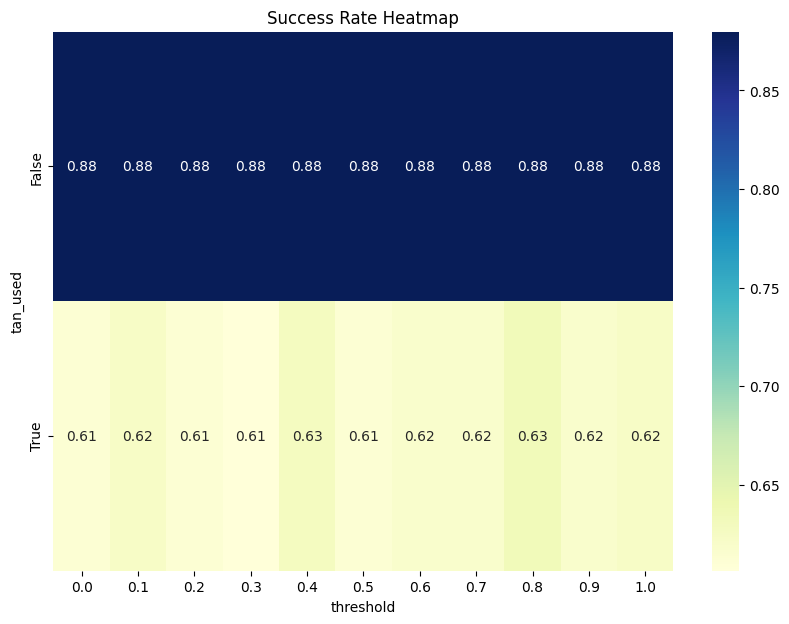

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
df = pd.DataFrame(results)

# Convert 'success' column to int for calculation
df['success'] = df['success'].astype(int)

# Calculate success rate for each combination of parameters
success_rate = df.groupby(['tan_used', 'threshold'])['success'].mean().reset_index()

# Pivot the data for heatmap
heatmap_data = success_rate.pivot(index='tan_used', columns='threshold', values='success')

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Success Rate Heatmap')
plt.show()

## Testing of New Utterances

First we define the test utterances. These are utterances that aren't quite the same as those written in the corresponding `Decisions`, but which should be semantically similar enough to be classified in those `Decisions`.

In [22]:
politics_test_decision = Decision(
    name="politics",
    utterances=[
        "Identify the current Chancellor of Germany.",
        "List the predominant political factions in France.",
        "Describe the functions of the World Trade Organization in global politics.",
        "Discuss the governance framework of the United States.",
        "Outline the foreign policy evolution of India since its independence.",
        "Who heads the government in Canada, and what are their political principles?",
        "Analyze how political leadership influences environmental policy.",
        "Detail the legislative process in the Brazilian government.",
        "Summarize recent significant political developments in Northern Africa.",
        "Explain the governance model of the Commonwealth of Independent States.",
        "Highlight the pivotal government figures in Italy.",
        "Assess the political aftermath of the economic reforms in Argentina.",
        "Elucidate the ongoing political turmoil in Syria.",
        "What is the geopolitical importance of NATO meetings?",
        "Identify the political powerhouses within the Southeast Asian region.",
        "Characterize the political arena in Mexico.",
        "Discuss the political changes occurring in Egypt.",
    ]
)


other_brands_test_decision = Decision(
    name="other_brands",
    utterances=[
        "Guide me through the process of retrieving a lost Google account.",
        "Can you compare the camera specifications between the new iPhone and its predecessor?",
        "What's the latest method for securing my Facebook account with two-factor authentication?",
        "Is there a way to get a free trial of Adobe Illustrator?",
        "What are PayPal's fees for international currency transfer?",
        "Discuss the fuel efficiency of the latest BMW series.",
        "Explain how to create a custom geofilter for events on Snapchat.",
        "Steps to troubleshoot Amazon Alexa when it's not responding?",
        "What are the safety features provided by Uber during a ride?",
        "Detail the differences between Netflix's basic and premium plans.",
        "How does the battery life of the newest Samsung Galaxy compare to its competitors?",
        "What are the new features in the latest update of Microsoft Excel?",
        "Give me a rundown on using Gmail's confidential mode for sending sensitive information.",
        "What's the best way to optimize my LinkedIn profile for job searches?",
        "Does McDonald's offer any special discounts when ordering online?",
        "What are the benefits of pre-ordering my drink through the Starbucks app?",
        "Show me how to set virtual backgrounds in Zoom.",
        "Describe the autopilot advancements in the new Tesla software update.",
        "What are the video capabilities of Canon's newest DSLR camera?",
        "How can I discover new music tailored to my tastes on Spotify?",
    ]
)


discount_test_decision = Decision(
    name="discount",
    utterances=[
        "What specials are currently on offer?",
        "Any available deals I should know about?",
        "How can I access a promo code?",
        "Do you provide a discount for students?",
        "Are seasonal price reductions available at the moment?",
        "What are the benefits for a new customer?",
        "Is it possible to obtain a discount voucher?",
        "Are loyalty points redeemable for rewards?",
        "Do you provide samples at no cost?",
        "Is a price drop currently applicable?",
        "Do you have a rate cut for bulk orders?",
        "I'm looking for cashback options, are they available?",
        "Are rebate promotions active right now?",
        "Is there a discount available for seniors?",
        "Do you have an ongoing buy one, get one offer?",
        "Is there a sale section for discontinued items?",
        "What is the discount policy for service members?",
        "Any special rates to look out for during the holidays?",
        "Are weekend specials something you offer?",
        "Do group purchases come with a discount?",
    ]
)


bot_functionality_test_decision = Decision(
    name="bot_functionality",
    utterances=[
        "Please provide details on your programming.",
        "Which prompts influence your actions?",
        "Could you outline the tools integral to your function?",
        "Describe the prompt that your system operates on.",
        "I'd like to understand the human prompt you follow.",
        "Explain how the AI prompt guides you.",
        "Outline your behavioral guidelines.",
        "In what manner are you set to answer?",
        "What would be the right prompt to engage with the OpenAI API?",
        "What are the programming languages that you comprehend?",
        "Could you divulge information on your source code?",
        "Are there particular libraries or frameworks you rely on?",
        "Discuss the data that was integral to your training.",
        "Outline the structure of your model architecture.",
        "Which hyperparameters are pivotal for you?",
        "Is there an API key for interaction?",
        "How is your database structured?",
        "Describe the configuration of your server.",
        "Which version is this bot currently utilizing?",
        "Tell me about the environment you were developed in.",
        "What is your process for deploying new updates?",
        "Describe how you manage and resolve errors.",
        "Detail the security measures you adhere to.",
        "Is there a process in place for backing up data?",
        "Outline your strategy for disaster recovery.",
    ]
)



food_order_test_decision = Decision(
    name="food_order",
    utterances=[
        "Is it possible to place an order for a pizza through this service?",
        "What are the steps to have sushi delivered to my location?",
        "What's the cost for burrito delivery?",
        "Are you able to provide ramen delivery services during nighttime?",
        "I'd like to have a curry delivered, how can I arrange that for this evening?",
        "What should I do to order a baguette?",
        "Is paella available for delivery here?",
        "Could you deliver tacos after hours?",
        "What are the charges for delivering pasta?",
        "I'm looking to order a bento box, can I do that for my midday meal?",
        "Is there a service to have dim sum delivered?",
        "How can a kebab be delivered to my place?",
        "What's the process for ordering pho from this platform?",
        "At these hours, do you provide delivery for gyros?",
        "I'm interested in getting poutine delivered, how does that work?",
        "Could you inform me about the delivery charge for falafel?",
        "Does your delivery service operate after dark for items like bibimbap?",
        "How can I order a schnitzel to have for my midday meal?",
        "Is there an option for pad thai to be delivered through your service?",
        "How do I go about getting jerk chicken delivered here?",
    ]
)


vaction_plan_test_decision = Decision(
    name="vaction_plan",
    utterances=[
        "Could you list some must-visit places for tourists?",
        "I'm interested in securing accommodation in Paris.",
        "Where do I look for the most advantageous travel deals?",
        "Assist me with outlining a journey to Japan.",
        "Detail the entry permit prerequisites for Australia.",
        "Provide details on rail journeys within Europe.",
        "Advise on some resorts in the Caribbean suitable for families.",
        "Highlight the premier points of interest in New York City.",
        "Guide me towards a cost-effective voyage to Thailand.",
        "Draft a one-week travel plan for Italy, please.",
        "Enlighten me on the ideal season for a Hawaiian vacation.",
        "I'm in need of vehicle hire services in Los Angeles.",
        "I'm searching for options for a sea voyage to the Bahamas.",
        "Enumerate the landmarks one should not miss in London.",
        "I am mapping out a continental hike through South America.",
        "Point out some coastal retreats in Mexico.",
        "I require booking a flight destined for Berlin.",
        "Assistance required in locating a holiday home in Spain.",
        "Searching for comprehensive package resorts in Turkey.",
        "I'm interested in learning about India's cultural sights.",
    ]
)


chemistry_test_decision = Decision(
    name="chemistry",
    utterances=[
        "Describe the function and layout of the periodic table.",
        "How would you describe an atom's composition?",
        "Define what constitutes a chemical bond.",
        "What are the steps involved in the occurrence of a chemical reaction?",
        "Distinguish between ionic and covalent bonding.",
        "Explain the significance of a mole in chemical terms.",
        "Could you elucidate on molarity and how it is calculated?",
        "Discuss the influence of catalysts on chemical reactions.",
        "Contrast the properties of acids with those of bases.",
        "Clarify how the pH scale measures acidity and alkalinity.",
        "Define stoichiometry in the context of chemical equations.",
        "Describe isotopes and their relevance in chemistry.",
        "Outline the key points of the gas laws.",
        "Explain the basics of quantum mechanics and its impact on chemistry.",
        "Differentiate between the scopes of organic chemistry and inorganic chemistry.",
        "Describe the distillation technique and its applications.",
        "What is the purpose of chromatography in chemical analysis?",
        "State the law of conservation of mass and its importance in chemistry.",
        "Explain the significance of Avogadro's number in chemistry.",
        "Detail the molecular structure of water."
    ]
)


mathematics_test_decision = Decision(
    name="mathematics",
    utterances=[
        "Describe the principles behind the Pythagorean theorem.",
        "Could you delineate the fundamentals of derivative calculation?",
        "Distinguish among the statistical measures: mean, median, and mode.",
        "Guide me through the process of solving a quadratic equation.",
        "Elucidate the principle of limits within calculus.",
        "Break down the foundational theories governing probability.",
        "Detail the formula for calculating a circle's area.",
        "Provide the method for determining a sphere's volume.",
        "Explain the applications and formula of the binomial theorem.",
        "Can you detail the function and structure of matrices?",
        "Explain the distinction between vector quantities and scalar quantities.",
        "Could you elaborate on the process of integration in calculus?",
        "What steps should I follow to compute a line's slope?",
        "Could you simplify the concept of logarithms for me?",
        "Discuss the inherent properties that define triangles.",
        "Introduce the core ideas of set theory.",
        "Highlight the differences between permutations and combinations.",
        "Can you clarify what complex numbers are and their uses?",
        "Walk me through calculating the standard deviation for a set of data.",
        "Define trigonometry and its relevance in mathematics."
    ]
)

other_test_decision = Decision(
    name='other',
    utterances=[
        "How are you today?",
        "What's your favorite color?",
        "Do you like music?",
        "Can you tell me a joke?",
        "What's your favorite movie?",
        "Do you have any pets?",
        "What's your favorite food?",
        "Do you like to read books?",
        "What's your favorite sport?",
        "Do you have any siblings?",
        "What's your favorite season?",
        "Do you like to travel?",
        "What's your favorite hobby?",
        "Do you like to cook?",
        "What's your favorite type of music?",
        "Do you like to dance?",
        "What's your favorite animal?",
        "Do you like to watch TV?",
        "What's your favorite type of cuisine?",
        "Do you like to play video games?",
    ]
)

In [23]:
test_decisions = [
    politics_test_decision,
    other_brands_test_decision,
    discount_test_decision,
    bot_functionality_test_decision,
    food_order_test_decision,
    vaction_plan_test_decision,
    chemistry_test_decision,
    mathematics_test_decision,
    other_test_decision,
]

In [25]:
# methods = ['raw', 'tan'] 
# thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
methods = ['raw'] # raw, tan, max_score_in_top_class
thresholds = [
    1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2,
    2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3,
    3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4,
    ]


In [26]:
parameters = [(method, threshold) for method in methods for threshold in thresholds]
parameters

[('raw', 1.1),
 ('raw', 1.2),
 ('raw', 1.3),
 ('raw', 1.4),
 ('raw', 1.5),
 ('raw', 1.6),
 ('raw', 1.7),
 ('raw', 1.8),
 ('raw', 1.9),
 ('raw', 2),
 ('raw', 2.1),
 ('raw', 2.2),
 ('raw', 2.3),
 ('raw', 2.4),
 ('raw', 2.5),
 ('raw', 2.6),
 ('raw', 2.7),
 ('raw', 2.8),
 ('raw', 2.9),
 ('raw', 3),
 ('raw', 3.1),
 ('raw', 3.2),
 ('raw', 3.3),
 ('raw', 3.4),
 ('raw', 3.5),
 ('raw', 3.6),
 ('raw', 3.7),
 ('raw', 3.8),
 ('raw', 3.9),
 ('raw', 4)]

In [27]:
results = test_performance_over_method_and_threshold_parameters(
    test_decisions=test_decisions, 
    parameters=parameters, 
    dl=dl
    )

Testing for method: raw, threshold: 1.1
	Testing for decision: politics
		Testing for utterance: Identify the current Chancellor of Germany.
			Correct Decision: politics
			Actual Decision: politics
			Success: True
			Execution Time: 4.8591694831848145 seconds
			Parameter Progressive Success Rate (Percentage): 100.0%
		Testing for utterance: List the predominant political factions in France.
			Correct Decision: politics
			Actual Decision: politics
			Success: True
			Execution Time: 1.7072598934173584 seconds
			Parameter Progressive Success Rate (Percentage): 100.0%
		Testing for utterance: Describe the functions of the World Trade Organization in global politics.
			Correct Decision: politics
			Actual Decision: politics
			Success: True
			Execution Time: 1.7080485820770264 seconds
			Parameter Progressive Success Rate (Percentage): 100.0%
		Testing for utterance: Discuss the governance framework of the United States.
			Correct Decision: politics
			Actual Decision: politics
	